In [130]:
#############Load libraries#################
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import csv

In [131]:
## Read the file#####################
product_file = pd.read_csv("Mobile_and_applications.csv")
################Convert price column to int#########

brands = product_file['Brand']

##############Check the number of different brands##############
print(brands.nunique())

567


In [132]:
############################Now lets do some EDA#################################
###############################What is the most ratings of products?##################
product_file['Ratings'].value_counts(ascending=False)


4.1 out of 5 stars    260
4.0 out of 5 stars    234
3.8 out of 5 stars    200
3.9 out of 5 stars    195
4.2 out of 5 stars    180
4.3 out of 5 stars    171
3.7 out of 5 stars    156
4.4 out of 5 stars    117
4.5 out of 5 stars    108
3.5 out of 5 stars     98
3.4 out of 5 stars     85
3.6 out of 5 stars     85
3.3 out of 5 stars     79
4.6 out of 5 stars     71
5.0 out of 5 stars     57
-1                     53
3.2 out of 5 stars     52
3.0 out of 5 stars     40
3.1 out of 5 stars     35
4.7 out of 5 stars     31
2.9 out of 5 stars     24
2.8 out of 5 stars     12
4.8 out of 5 stars     11
4.9 out of 5 stars      7
1.0 out of 5 stars      6
2.6 out of 5 stars      5
2.7 out of 5 stars      5
2.5 out of 5 stars      3
2.4 out of 5 stars      2
2.2 out of 5 stars      2
2.1 out of 5 stars      1
1.5 out of 5 stars      1
1.8 out of 5 stars      1
2.0 out of 5 stars      1
Name: Ratings, dtype: int64

In [133]:
############################Lets check which brands have the most 4+ ratings#######################
brands_and_ratings = product_file[['Brand', 'Ratings']]
high_ratings_list = brands_and_ratings["Ratings"].str.startswith("4", na = False)
high_ratings_df = brands_and_ratings[high_ratings_list]
high_ratings_df['Brand'].value_counts(ascending=False)
##############Looks like people like their mobile covers and screen guards more than the mobiles##########

Spigen          110
TheGiftKart      63
AmazonBasics     55
Samsung          33
boAt             32
               ... 
MOOSH             1
MVYNO             1
Anik              1
SMILEDRIVE        1
MrSpares          1
Name: Brand, Length: 275, dtype: int64

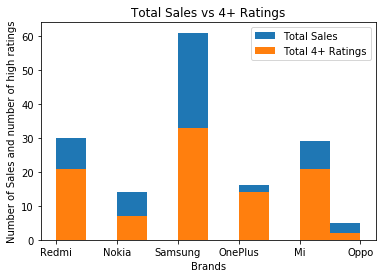

In [134]:
##########Amongst popular brands which has higher ratings
brands_list = ['Samsung', 'OnePlus', 'Redmi', 'Oppo', 'Nokia', 'Mi']
popular_brands = product_file[product_file["Brand"].isin(brands_list)]
four_plus_Ratings = popular_brands['Ratings'].str.startswith("4", na = False)
four_plus_df = popular_brands[four_plus_Ratings]
plt.hist(popular_brands['Brand'], label='Total Sales')
plt.hist(four_plus_df['Brand'], label='Total 4+ Ratings')
plt.title("Total Sales vs 4+ Ratings")
plt.xlabel("Brands")
plt.ylabel("Number of Sales and number of high ratings")
plt.legend()
#############################OnePlus has more than 90% approval Ratings#####################

In [135]:
pd.DataFrame(popular_brands)
popular_brands['Price Before Discount']
popular_brands.groupby('Brand').sum()
#popular_brands.loc[popular_brands['Brand'].isin(['Redmi']), ['Price Before Discount']].sum()

,Price Before Discount,Current Price
Brand,,
Mi,145620.0,128200.0
Nokia,46544.0,40776.0
OnePlus,101168.0,495057.0
Oppo,75459.0,62580.0
Redmi,88391.0,378461.0
Samsung,1207716.0,988108.0


Samsung    37
Redmi      29
Mi         23
OnePlus    13
Nokia      10
Name: Brand, dtype: int64


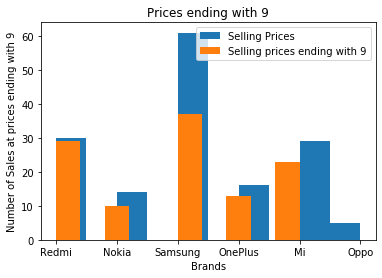

In [168]:
###################Lets check how many times do popular brands showcase prices ending with 9, such as 999, 1999##########
number_end ="9.0" 
# boolean series returned with False at place of NaN
str_nu= popular_brands['Current Price'].apply(str)
bool_series = str_nu.str.endswith(number_end, na = False)
#print(popular_brands['Price Before Discount'])  
# displaying filtered dataframe 
nine_ending_company=popular_brands[bool_series]
print(nine_ending_company['Brand'].value_counts(ascending=False))
plt.hist(popular_brands['Brand'], label='Selling Prices')
plt.hist(nine_ending_company['Brand'], label='Selling prices ending with 9')
plt.title("Prices ending with 9")
plt.xlabel("Brands")
plt.ylabel("Number of Sales at prices ending with 9")
plt.legend()